In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
from hierarchicalcausalmodels.models.HSCM.HSCM import HSCM # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy.stats import norm, expon # type: ignore


In [12]:
!ls

futures  hierarchicalcausalmodels


In [13]:
temp_path = "hierarchicalcausalmodels/table/real_data/propermodel"


In [14]:

# Chargement des données
datasets = []
dataset_names = [
    'PA1.0_D0.0_HC0.0_S0.0_HBP0.0',
    'PA1.0_D0.0_HC0.0_S1.0_HBP0.0',
    'PA1.0_D0.0_HC1.0_S0.0_HBP0.0',
    'PA1.0_D0.0_HC1.0_S1.0_HBP1.0',
    'PA1.0_D0.0_HC1.0_S0.0_HBP1.0',
    'PA1.0_D0.0_HC0.0_S0.0_HBP1.0',
    'PA1.0_D0.0_HC1.0_S1.0_HBP0.0',
    'PA1.0_D0.0_HC0.0_S1.0_HBP1.0',
    'PA0.0_D0.0_HC0.0_S0.0_HBP0.0',
    'PA0.0_D0.0_HC0.0_S1.0_HBP0.0',
    'PA0.0_D0.0_HC1.0_S1.0_HBP1.0',
    'PA1.0_D2.0_HC1.0_S1.0_HBP1.0',
    'PA0.0_D0.0_HC1.0_S0.0_HBP1.0',
    'PA1.0_D2.0_HC1.0_S0.0_HBP1.0'
]

for dataset_name in dataset_names:
    df = pd.read_csv(f'{temp_path}/datasets/{dataset_name}.csv')
    datasets.append(df)

# Préparation des données

ages = []
bmis = []
PA = []
D = []
HC = []
S = []
HBP = []

for i, df in enumerate(datasets):
    n_students = len(df)
    ages.extend(df['Age'])
    bmis.extend(df['BMI'])


n_schools = len(datasets)
n_students = len(ages)

# Define the HSCM model structure
nodes = ["Age", "BMI", 'PA','D','HC','S','HBP']
edges = [('Age','BMI'),('Age','PA'),('PA','D'),('PA','HC'),('PA','HBP'),('S','D'),('BMI','D'),("BMI",'HBP')]

unit_nodes = ['PA','D','HC','S','HBP']

subunit_nodes = ["Age","bmi"]


sizes = [len(df) for df in datasets]

# Initialize the HSCM model
hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)



In [42]:
# Importation des bibliothèques nécessaires
import pandas as pd # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
from sklearn.metrics import accuracy_score # type: ignore

# Chargement des données
df = pd.read_csv('hierarchicalcausalmodels/table/real_data/propermodel/datasets/selected_diabetes_indicators.csv', header=None)
df.columns = ['Age', 'BMI', 'PA', 'HBP', 'HC', 'S', 'D']


/tmp/ipykernel_10258/682668348.py:9: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('hierarchicalcausalmodels/table/real_data/propermodel/datasets/selected_diabetes_indicators.csv', header=None)


In [43]:
df.head()
df = df.iloc[1:]  # Supprime la première ligne
df.head()



,Age,BMI,PA,HBP,HC,S,D
1,9.0,40.0,0.0,1.0,0.0,1.0,1.0
2,7.0,25.0,1.0,0.0,0.0,0.0,1.0
3,9.0,28.0,0.0,1.0,0.0,1.0,0.0
4,11.0,27.0,1.0,1.0,0.0,0.0,0.0
5,11.0,24.0,1.0,1.0,0.0,1.0,0.0


In [30]:

# Fonction pour entraîner et évaluer un modèle pour chaque variable catégorielle
def train_predictor(X, y, variable_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Précision de la prédiction de {variable_name} : {accuracy:.2f}")
    
    return model, scaler


In [51]:
df.head()

,Age,BMI,PA,HBP,HC,S,D
1,9.0,40.0,0,1,0,1,1
2,7.0,25.0,1,0,0,0,1
3,9.0,28.0,0,1,0,1,0
4,11.0,27.0,1,1,0,0,0
5,11.0,24.0,1,1,0,1,0


In [45]:
# Convertir d'abord en float
df['PA'] = df['PA'].astype(float)
df['HBP'] = df['HBP'].astype(float)
df['HC'] = df['HC'].astype(float)
df['S'] = df['S'].astype(float)
df['D'] = df['D'].astype(float)

# Puis arrondir et convertir en int
df['PA'] = df['PA'].round().astype(int)
df['HBP'] = df['HBP'].round().astype(int)
df['HC'] = df['HC'].round().astype(int)
df['S'] = df['S'].round().astype(int)
df['D'] = df['D'].round().astype(int)

# Vérifier les types de données
print(df.dtypes)

Age    float64
BMI    float64
PA       int64
HBP      int64
HC       int64
S        int64
D        int64
dtype: object


In [46]:

# Entraînement des prédicteurs pour chaque variable catégorielle
predictors = {}

# PA (Physical Activity)
X_PA = df[['Age', 'BMI']]
y_PA = df['PA']
print(X_PA.head(),y_PA.head())


predictors['PA'], scalers_PA = train_predictor(X_PA, y_PA, 'PA')


    Age   BMI
1   9.0  40.0
2   7.0  25.0
3   9.0  28.0
4  11.0  27.0
5  11.0  24.0 1    0
2    1
3    0
4    1
5    1
Name: PA, dtype: int64
Précision de la prédiction de PA : 0.76


In [47]:

# HBP (High Blood Pressure)
X_HBP = df[['Age', 'BMI', 'PA']]
y_HBP = df['HBP']
predictors['HBP'], scalers_HBP = train_predictor(X_HBP, y_HBP, 'HBP')

# HC (High Cholesterol)
X_HC = df[['Age', 'BMI', 'PA']]
y_HC = df['HC']
predictors['HC'], scalers_HC = train_predictor(X_HC, y_HC, 'HC')

# S (Smoker)
X_S = df[['Age', 'BMI']]
y_S = df['S']
predictors['S'], scalers_S = train_predictor(X_S, y_S, 'S')

# D (Diabetes)
X_D = df[['Age', 'BMI', 'PA', 'HBP', 'HC', 'S']]
y_D = df['D']
predictors['D'], scalers_D = train_predictor(X_D, y_D, 'D')

# Stockage des prédicteurs et des scalers dans le modèle HSCM
hscm.predictors = predictors
hscm.scalers = {
    'PA': scalers_PA,
    'HBP': scalers_HBP,
    'HC': scalers_HC,
    'S': scalers_S,
    'D': scalers_D
}

print("Tous les prédicteurs ont été entraînés et stockés dans le modèle HSCM.")


Précision de la prédiction de HBP : 0.69
Précision de la prédiction de HC : 0.84
Précision de la prédiction de S : 0.64
Précision de la prédiction de D : 0.57
Tous les prédicteurs ont été entraînés et stockés dans le modèle HSCM.


In [49]:
print(predictors)


{'PA': RandomForestClassifier(random_state=42), 'HBP': RandomForestClassifier(random_state=42), 'HC': RandomForestClassifier(random_state=42), 'S': RandomForestClassifier(random_state=42), 'D': RandomForestClassifier(random_state=42)}


On va faire maintenant des predictions hiérarchiques, en augmentant le graphe au max en terme de connaissances, et pour les prédictions, on va utiliser les prédicteurs que l'on a entraînés, en prenant la moyenne des predictions pour les élèves d'une meme école


le modèle causal non hiérarchique en revnahce que l'on traitera dans un second temps, ne prendras
pas en compte toute l'école et donc ne prendras pas en compte les correlations entre les élèves d'une meme école, il s'agira donc d'un modèle de régressoin global progressif non hiérarchique


In [18]:

# Application du pipeline à chaque dataset
all_predictions = []
for i, dataset in enumerate(datasets):
    print(f"\nPrédictions pour le dataset {i+1}:")
    predictions = causal_prediction_pipeline(dataset)
    all_predictions.append(predictions)
    print(predictions.head())

# Vous pouvez maintenant utiliser all_predictions pour d'autres analyses ou visualisations



Prédictions pour le dataset 1:


TypeError: predict_PA() missing 1 required positional argument: 'PA_value'

In [11]:

# Échantillonner des données à partir du modèle
sampled_data = hscm.sample_data()


KeyboardInterrupt: 

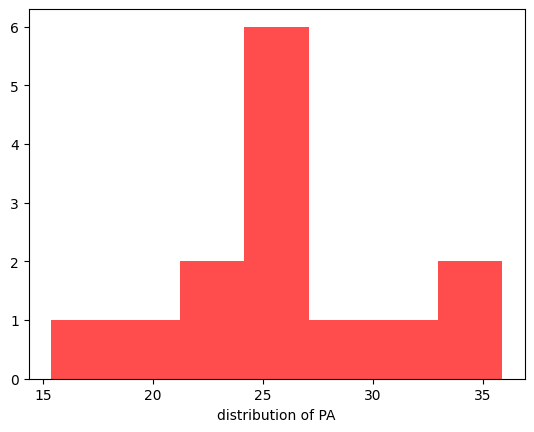

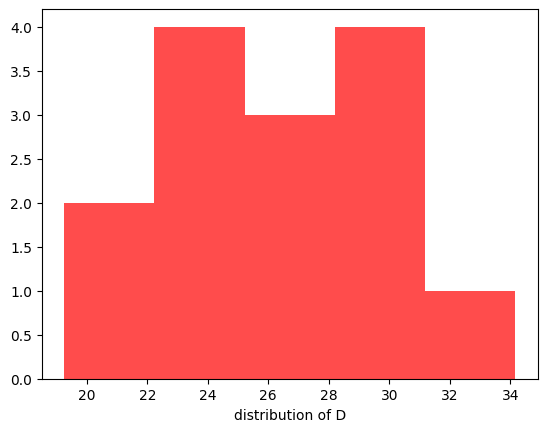

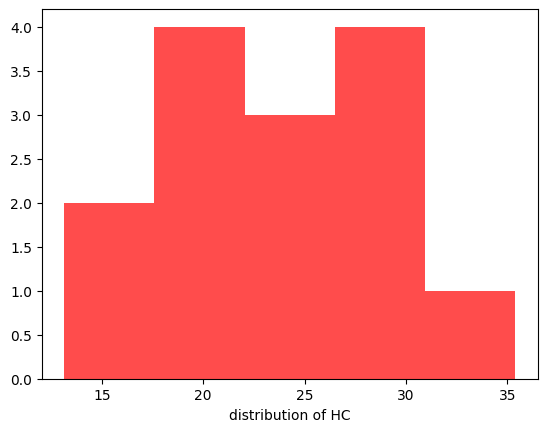

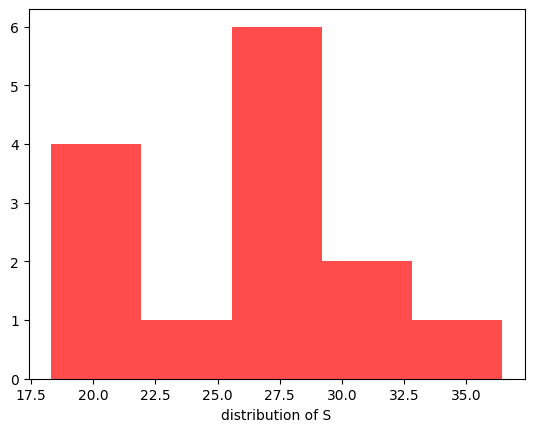

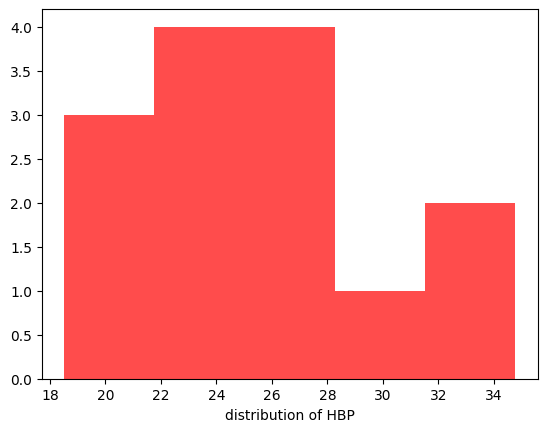

[[32.54076816755016,
  20.32014045579332,
  28.207846397955535,
  24.831267965299485,
  25.522226330705315,
  23.685756505132876,
  24.612852399142398,
  24.91066988006103,
  26.542830407792955,
  35.87919433898144,
  23.313721740191532,
  35.59649703720446,
  25.179703340154877,
  15.373333739164384],
 [21.512627684835746,
  28.16605774548252,
  24.550952411899143,
  34.161871233156376,
  19.255092497515633,
  23.894194687173563,
  27.611075970424324,
  23.697053469263242,
  30.019964446517125,
  28.441042245974383,
  28.828728764100823,
  30.362595243404016,
  27.77054407866433,
  23.82569226302739],
 [28.344608393536944,
  29.907380345787995,
  23.766458251446878,
  15.527823299125917,
  23.08483388717903,
  35.38424495719899,
  13.15005753789121,
  17.71968645612099,
  23.659764114329672,
  20.938327259448663,
  18.919109738639015,
  28.869488647970115,
  29.056535614726787,
  21.6680713239119],
 [27.87254687097814,
  36.439873739030574,
  23.473690258045327,
  19.469732861176567,


In [11]:

# Tracer les données échantillonnées
hscm.plot_data()


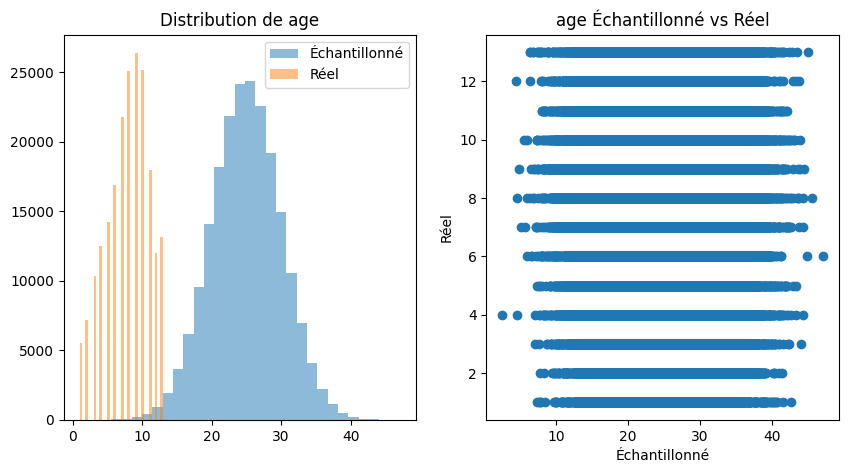

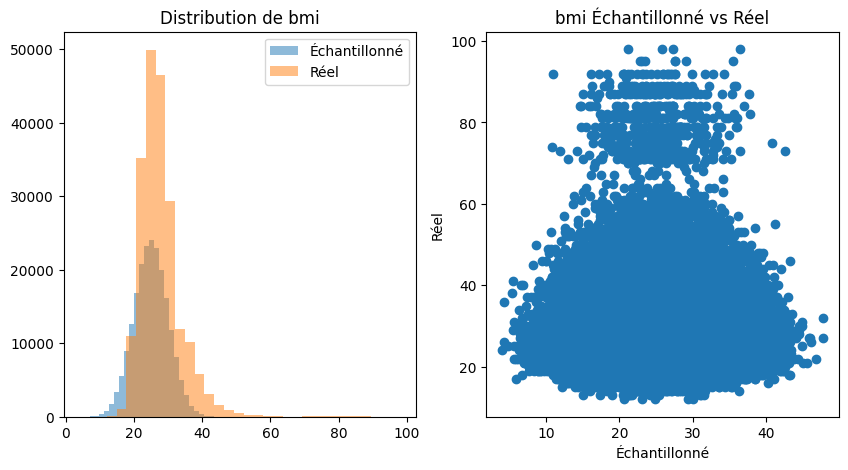

Corrélations dans les données échantillonnées :
          age       bmi
age  1.000000 -0.000616
bmi -0.000616  1.000000

Corrélations dans les données réelles :
          age       bmi
age  1.000000 -0.045701
bmi -0.045701  1.000000


In [13]:
# Comparer les données échantillonnées avec les données réelles
for node in nodes:
    if node not in ["PA", "D", "HC", "S", "HBP"]:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        
        # Récupérer toutes les valeurs échantillonnées pour le noeud
        sampled_values = []
        for i in range(len(sizes)):
            for j in range(sizes[i]):
                key = f"_{node}{i}_{j}" if node in subunit_nodes else f"{node}{i}"
                if key in sampled_data:
                    sampled_values.append(sampled_data[key])
        
        plt.hist(sampled_values, bins=30, alpha=0.5, label='Échantillonné')
        plt.hist(eval(node + "s"), bins=30, alpha=0.5, label='Réel')
        plt.title(f'Distribution de {node}')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.scatter(sampled_values[:len(eval(node + "s"))], eval(node + "s"))
        plt.xlabel('Échantillonné')
        plt.ylabel('Réel')
        plt.title(f'{node} Échantillonné vs Réel')
        plt.show()

# Calculer les corrélations
sampled_df = pd.DataFrame()
for node in nodes:
    if node not in ["PA", "D", "HC", "S", "HBP"]:
        sampled_values = []
        for i in range(len(sizes)):
            for j in range(sizes[i]):
                key = f"_{node}{i}_{j}" if node in subunit_nodes else f"{node}{i}"
                if key in sampled_data:
                    sampled_values.append(sampled_data[key])
        sampled_df[node] = sampled_values[:len(ages)]  # Utiliser la même longueur que les données réelles

real_df = pd.DataFrame({"age": ages, "bmi": bmis})

print("Corrélations dans les données échantillonnées :")
print(sampled_df.corr())
print("\nCorrélations dans les données réelles :")
print(real_df.corr())